# Part 1: Data Wrangling

## Problem 1:

Just to see the data before we work with it

In [1]:
import sqlite3 as sql
import pandas as pd

sqlfile = 'lahman2014.sqlite'
conn = sql.connect(sqlfile)

query = 'SELECT * FROM Salaries'
query2 = 'select * from teams'
result1 = pd.read_sql(query, conn)
result2 = pd.read_sql(query2, conn)
print(result1)
result2

       yearID teamID lgID   playerID      salary
0        1985    ATL   NL  barkele01    870000.0
1        1985    ATL   NL  bedrost01    550000.0
2        1985    ATL   NL  benedbr01    545000.0
3        1985    ATL   NL   campri01    633333.0
4        1985    ATL   NL  ceronri01    625000.0
...       ...    ...  ...        ...         ...
24753    2014    WAS   NL  storedr01   3450000.0
24754    2014    WAS   NL  strasst01   3975000.0
24755    2014    WAS   NL  werthja01  20000000.0
24756    2014    WAS   NL  zimmejo02   7500000.0
24757    2014    WAS   NL  zimmery01  14000000.0

[24758 rows x 5 columns]


,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NA,BS1,BNA,None,3,31,NaN,20,10,...,NaN,0.830,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NA,CH1,CNA,None,2,28,NaN,19,9,...,NaN,0.820,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NA,CL1,CFC,None,8,29,NaN,10,19,...,NaN,0.810,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NA,FW1,KEK,None,7,19,NaN,7,12,...,NaN,0.800,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NA,NY2,NNA,None,5,33,NaN,16,17,...,NaN,0.830,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770,2014,NL,PIT,PIT,C,2,162,81.0,88,74,...,148.0,0.983,Pittsburgh Pirates,PNC Park,2442564.0,98,97,PIT,PIT,PIT
2771,2014,NL,SDN,SDP,W,3,162,81.0,77,85,...,124.0,0.983,San Diego Padres,Petco Park,2195373.0,91,91,SDP,SDN,SDN
2772,2014,NL,SFN,SFG,W,2,162,81.0,88,74,...,155.0,0.984,San Francisco Giants,AT&T Park,3368697.0,95,95,SFG,SFN,SFN
2773,2014,NL,SLN,STL,C,1,162,81.0,90,72,...,145.0,0.985,St. Louis Cardinals,Busch Stadium III,3540649.0,101,100,STL,SLN,SLN


Testing which attributes have null values.

As shown below neither **teamID** nor **yearID** have tuples in either relation that are null, hence they are the ideal attributes on which we should join these relations

In [2]:
query_null_salaries = 'select teamID, yearID from Salaries where teamID is null or yearID is null'
query_null_teams = 'select teamID, yearID from teams where teamID is null or yearID is null'
print(pd.read_sql(query_null_salaries, conn))
pd.read_sql(query_null_teams, conn)

Empty DataFrame
Columns: [teamID, yearID]
Index: []


,teamID,yearID


Hence to deal with null values in our database, I joined the two relations on **teamID** and **yearID** such that we have one comprehensive relation on which we can query in the future. This is how I dealt with the missing data.

In [4]:
query_ans = 'select teamID, yearID, sum(salary) as total_payroll, W as wins, G as games, cast(W as float)/G * 100 as winrate, franchID from Salaries join teams using(teamID, yearID) where yearID >= 1990 group by teamID, yearID order by teamID'

db = pd.read_sql(query_ans, conn)
db

,teamID,yearID,total_payroll,wins,games,winrate,franchID
0,ANA,1997,31135472.0,84,162,51.851852,ANA
1,ANA,1998,41281000.0,85,162,52.469136,ANA
2,ANA,1999,55388166.0,70,162,43.209877,ANA
3,ANA,2000,51464167.0,82,162,50.617284,ANA
4,ANA,2001,47535167.0,75,162,46.296296,ANA
...,...,...,...,...,...,...,...
723,WAS,2010,61400000.0,69,162,42.592593,WSN
724,WAS,2011,63856928.0,80,161,49.689441,WSN
725,WAS,2012,80855143.0,98,162,60.493827,WSN
726,WAS,2013,113703270.0,86,162,53.086420,WSN


# Part 2: EDA

## Payroll Distribution:

### Problem 2:

In [5]:
import matplotlib.pyplot as plt
import numpy as np

We need to generate a list of teams to generate time series data for each team.

In [6]:
#list of teams
teams_all = np.unique(db.iloc[:,0].values)
teams_all

array(['ANA', 'ARI', 'ATL', 'BAL', 'BOS', 'CAL', 'CHA', 'CHN', 'CIN',
       'CLE', 'COL', 'DET', 'FLO', 'HOU', 'KCA', 'LAA', 'LAN', 'MIA',
       'MIL', 'MIN', 'ML4', 'MON', 'NYA', 'NYN', 'OAK', 'PHI', 'PIT',
       'SDN', 'SEA', 'SFN', 'SLN', 'TBA', 'TEX', 'TOR', 'WAS'],
      dtype=object)

Now we can plot the evolution of net salary payout by teams over time. 

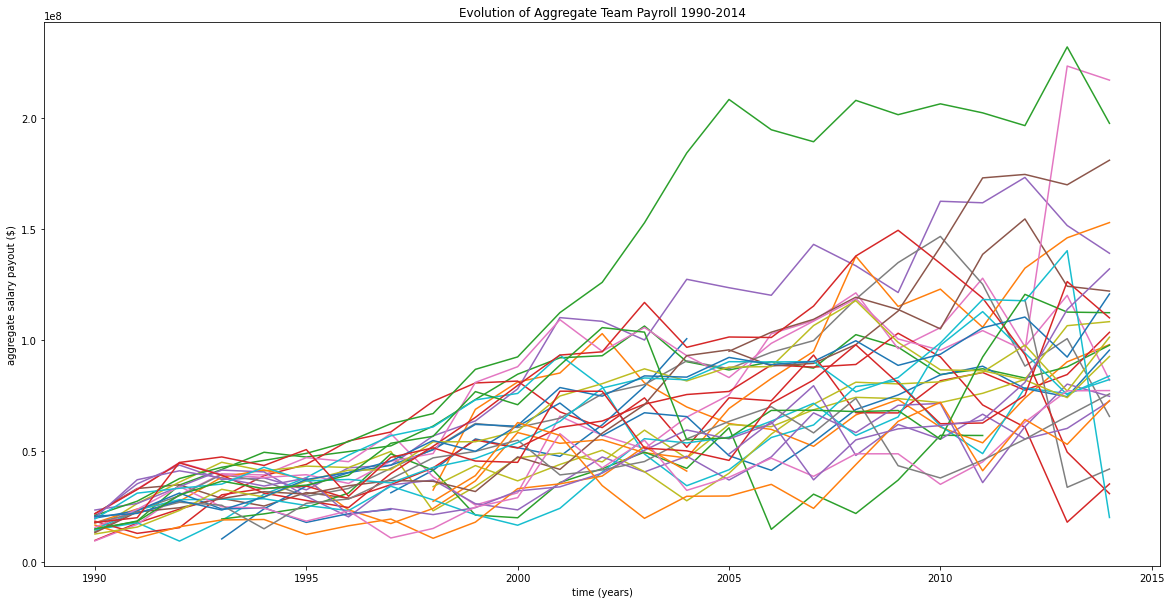

In [7]:
#setting up the plot with size, titles, and labels
plt.figure(figsize=(20,10))
plt.title('Evolution of Aggregate Team Payroll 1990-2014')
plt.xlabel('time (years)')
plt.ylabel('aggregate salary payout ($)')

for team in teams_all:
    #extracts all data for the current team
    sum_data = db[db['teamID'] == team]
    
    #plots that data and fills any value that was MIA with null (incase team didn't exist prior to a certain date)
    plt.plot(sum_data['yearID'], sum_data['total_payroll'].fillna(value=0))

plt.show()
    

### Question 1:
As a whole, both variance and mean seem to be increasing over time. That is, the spread/variance in total pay out for players team by team is increasing over time, but also the average/mean amount that a team is paying out to its players is also increasing over time (in terms of future linear regression analysis, we have to now understand that homoskedacicity has been broken rip). In fact, the difference in range of salaries paid in 1985 vs 2014 is enormous. The max salary payout in 2014 is about 200 million vs the max salary payout in 1985 was less than 50 million. That is a tectonic shift in terms of aggregate salary payout in 30 years.

### Problem 3:

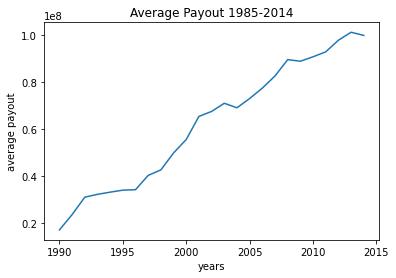

In [8]:
# generating the average payout per year
payout_mean = (db[['yearID', 'total_payroll']]).groupby('yearID').mean()

# adding titles, labels, and printing graph
plt.title('Average Payout 1985-2014')
plt.xlabel('years')
plt.ylabel('average payout')
plt.plot(payout_mean.index, payout_mean['total_payroll'])
plt.show()

## Correlation between payroll and winning percentage

### Problem 4:

Effectively, we can cut up our og data s.t. every tuple belongs to an epoch. On that, we can calculate averages
for each team in every time period/epoch. Here we are discretizing the data into 5 epochs.

In [9]:
# create dataframe for years (1990-2014)
years = pd.DataFrame(columns=['yearID'], data=np.arange(1990,2014,1))

#to generate a dataframe ordered by year, we can merge years and db to
relation = years.merge(db[['yearID','teamID','total_payroll','wins','games', 'winrate']], how='left', left_on=['yearID'],right_on=['yearID'])

# our five time periods ie epochs
epochs = ['1990-1994','1995-1999','2000-2004','2005-2009','2010-2014']

# we can add a new attr that defs for each tuple which epoch it belongs to
relation['epoch'] = pd.cut(relation['yearID'], right = False, bins = 5, labels = epochs)
relation

,yearID,teamID,total_payroll,wins,games,winrate,epoch
0,1990,ATL,14555501.0,65,162,40.123457,1990-1994
1,1990,BAL,9680084.0,76,161,47.204969,1990-1994
2,1990,BOS,20558333.0,88,162,54.320988,1990-1994
3,1990,CAL,21720000.0,80,162,49.382716,1990-1994
4,1990,CHA,9491500.0,94,162,58.024691,1990-1994
...,...,...,...,...,...,...,...
693,2013,SLN,92260110.0,97,162,59.876543,2010-2014
694,2013,TBA,52955272.0,92,163,56.441718,2010-2014
695,2013,TEX,112522600.0,91,163,55.828221,2010-2014
696,2013,TOR,126288100.0,74,162,45.679012,2010-2014


Here we are calculating the mean and graphing each epoch for every team.

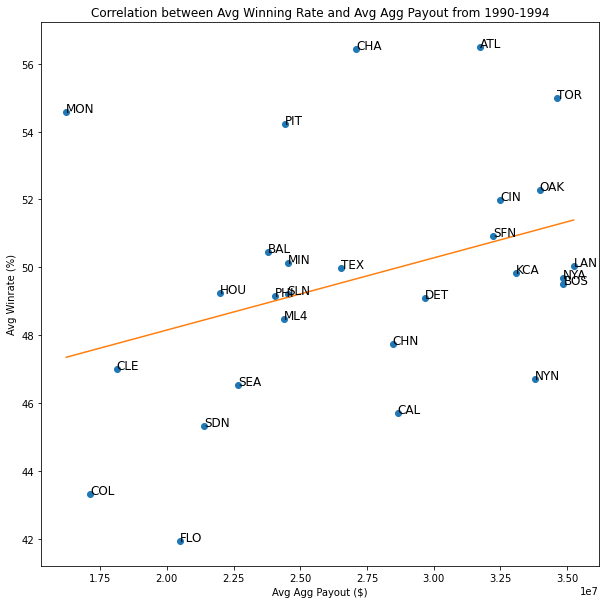

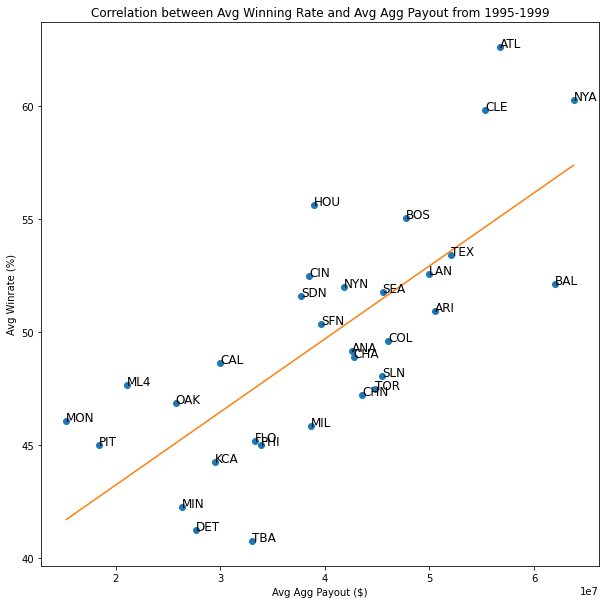

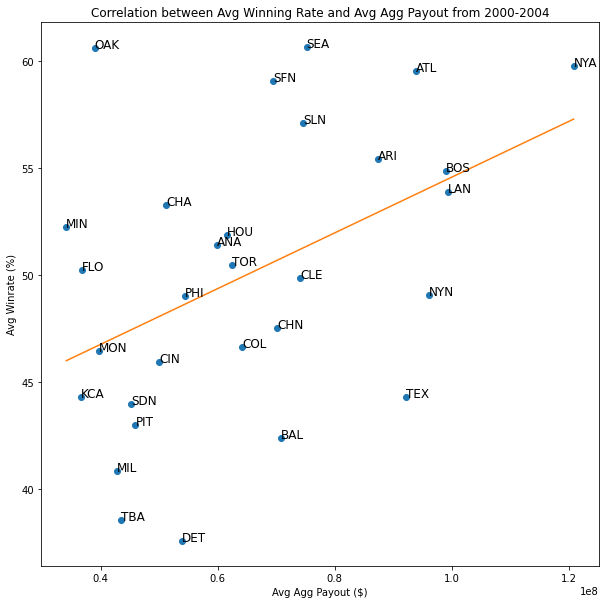

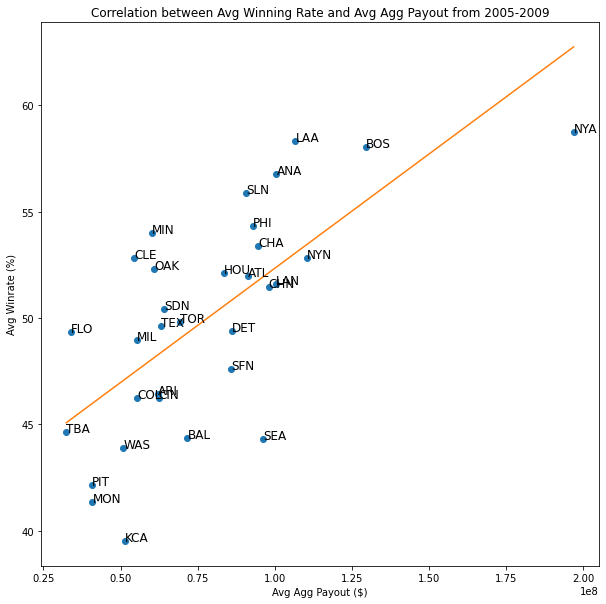

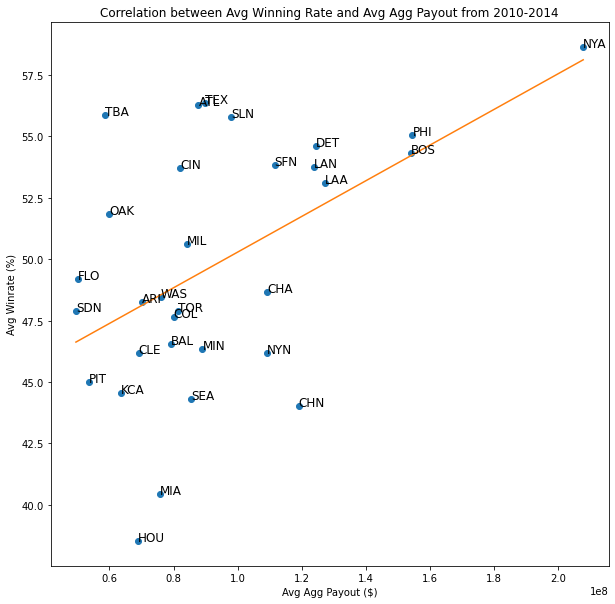

In [18]:
# iterating over every epoch
for interval in epochs:
    #extracting all team data in this epoch
    sum_data_in_epoch = relation[relation['epoch'] == interval]
    
    #returns the average pay out in this epoch for every team in a dataframe
    avg_payout_all = (sum_data_in_epoch.groupby(['teamID']))['total_payroll'].mean().to_frame()
    
    #returns average win rate in this epoch for every team in a dataframe
    avg_winrate_all = (sum_data_in_epoch.groupby(['teamID']))['winrate'].mean().to_frame()
    
    #merges our two relations above so that we have it all in one relation =)
    agg_all = avg_payout_all.merge(avg_winrate_all, how='inner', left_on=['teamID'], right_on=['teamID'])
    agg_all['teamID'] = agg_all.index
    agg_all.columns = ['avg_payroll', 'avg_winrate', 'teamID']
    
    # basic linear regression to ease data visualization 
    #(however this data does break homoskedacicity so they aren't "meaningful" in terms of wholisitc interpretation)
    linreg = np.poly1d(np.polyfit(x=agg_all['avg_payroll'].values, y=agg_all['avg_winrate'].values, deg=1))
    x_pred = np.linspace(agg_all['avg_payroll'].values.min(), agg_all['avg_payroll'].values.max(), 50)
    y_pred = linreg(x_pred)
    
    #plotting graph
    plt.figure(figsize=(10,10))
    plt.plot(agg_all['avg_payroll'].values, agg_all['avg_winrate'].values,'o', x_pred, y_pred)
    
    #allows us to see a label for every team
    for k, team_name in enumerate(agg_all['teamID']):
        plt.annotate(team_name, (agg_all['avg_payroll'].values[k], agg_all['avg_winrate'].values[k]), size = 12)
    
    plt.title("Correlation between Avg Winning Rate and Avg Agg Payout from " + interval)
    plt.xlabel("Avg Agg Payout ($)")
    plt.ylabel("Avg Winrate (%)")
    plt.show()

### Question 2:

On average, average team payrolls in every epoch have been increasing. The NYA team has been spending the most on average across all epochs after the first epoch, and have had consistently strong win rates associated with that, along with a minor drop in the 4th epoch. In fact, other than the 1st and 4th epochs, they have consistently performed *better* per unit of dollar spent compared to what would've been predicted in terms of their performance with the amount they were paying. OAK has been consistenly achieving great results for the less amount they pay. In EVERY epoch, they have had a higher than predicted winrate for the amount they have been paying, representing fantastic spending efficacy. 

# Part 3: Data transformations

## Standardizing across years

### Problem 5:

In [11]:
# using payout_mean from problem 3, calculating payout's std dev.
# converting each to a dataframe for later
payout_std = (db[['yearID', 'total_payroll']]).groupby('yearID').std()

# merging into one dataframe for use
payout_stats = payout_mean.merge(payout_std, how='inner', right_on=['yearID'], left_on=['yearID'])
payout_stats['yearID'] = payout_stats.index
payout_stats.columns = ['payout_mean', 'payout_std', 'yearID']
payout_stats

,payout_mean,payout_std,yearID
yearID,,,
1990,1.707235e+07,3.771834e+06,1990
1991,2.357879e+07,6.894669e+06,1991
1992,3.098244e+07,9.150607e+06,1992
1993,3.220500e+07,9.232485e+06,1993
1994,3.313701e+07,8.528749e+06,1994
1995,3.398105e+07,9.447998e+06,1995
1996,3.417798e+07,1.068853e+07,1996
1997,4.026021e+07,1.306073e+07,1997
1998,4.260943e+07,1.538081e+07,1998


We now have a dataframe with the payout averages and standard deviations for every year. We can use this to calculate the standardized payouts. 

In [12]:
# extracting data that we will need to calculate standardized payouts, and initing a new attr
payout_full = relation[['yearID', 'teamID', 'total_payroll', 'epoch']].copy()
payout_full['std_pay'] = 0.0

# iterating through and calculating standardized scores.
for j, ro in payout_full.iterrows():
    for k, po in payout_stats.iterrows():
        if ro['yearID'] == po['yearID']:
            # calculation of std scores
            payout_full['std_pay'][j] =  (payout_full['total_payroll'][j] - payout_stats['payout_mean'][k])/payout_stats['payout_std'][k]

payout_full

<ipython-input-12-d29e502abc69>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payout_full['std_pay'][j] =  (payout_full['total_payroll'][j] - payout_stats['payout_mean'][k])/payout_stats['payout_std'][k]


,yearID,teamID,total_payroll,epoch,std_pay
0,1990,ATL,14555501.0,1990-1994,-0.667275
1,1990,BAL,9680084.0,1990-1994,-1.959861
2,1990,BOS,20558333.0,1990-1994,0.924213
3,1990,CAL,21720000.0,1990-1994,1.232198
4,1990,CHA,9491500.0,1990-1994,-2.009859
...,...,...,...,...,...
693,2013,SLN,92260110.0,2010-2014,-0.182074
694,2013,TBA,52955272.0,2010-2014,-0.987002
695,2013,TEX,112522600.0,2010-2014,0.232883
696,2013,TOR,126288100.0,2010-2014,0.514788


### Problem 6:

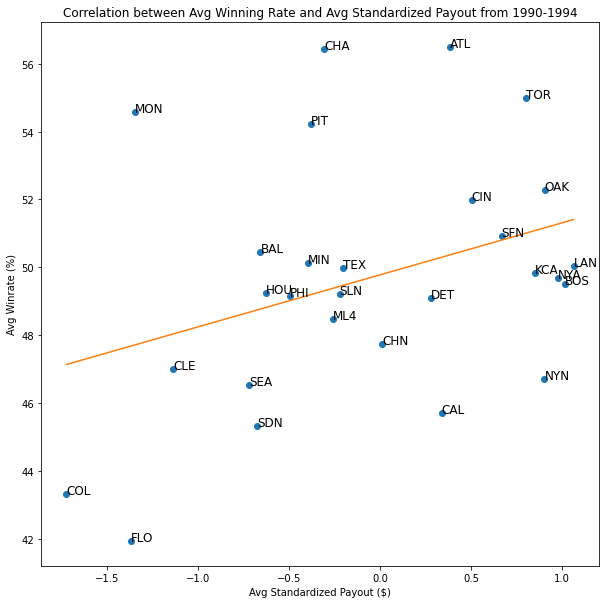

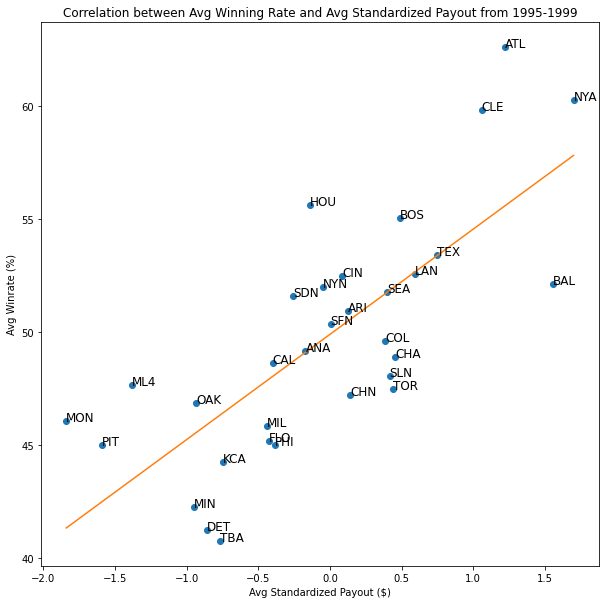

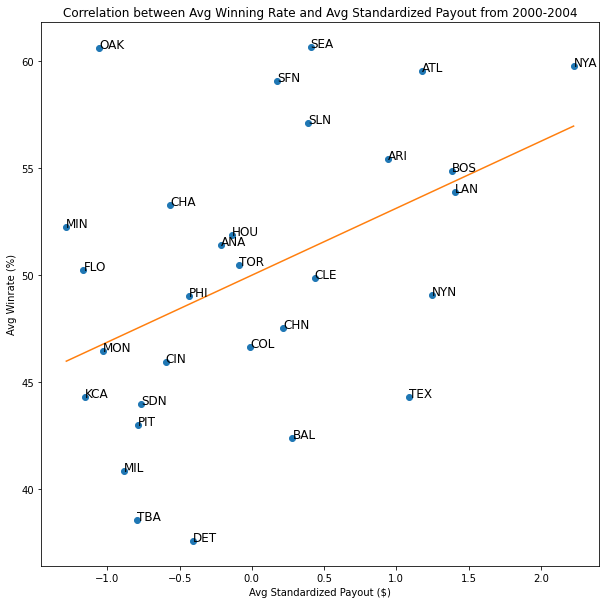

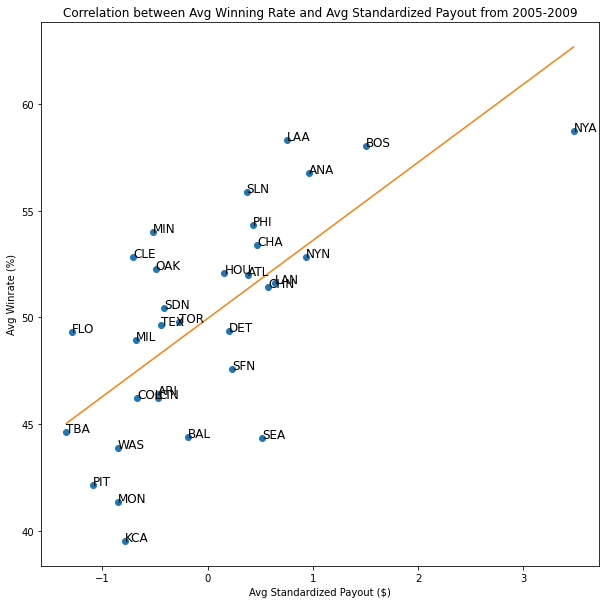

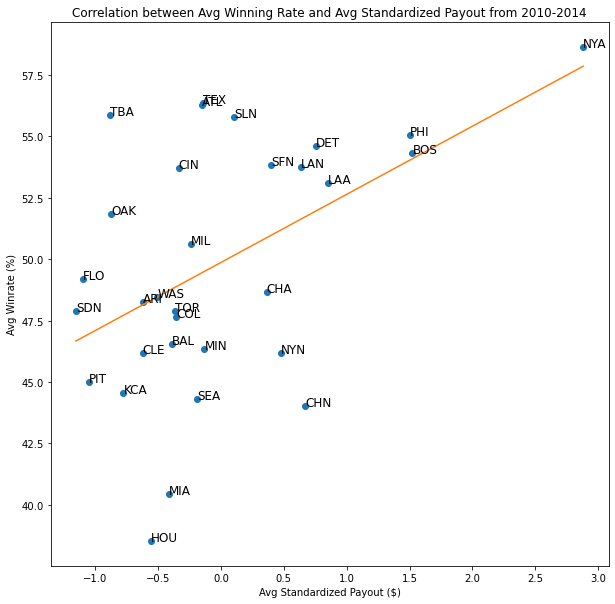

In [13]:
relation['std_pay'] = payout_full['std_pay'].values

# almost all code copy pasted from problem 4
for interval in epochs:
    #extracting all team data in this epoch
    sum_data_in_epoch = relation[relation['epoch'] == interval]
    
    #returns the average pay out in this epoch for every team in a dataframe
    avg_payout_all = (sum_data_in_epoch.groupby(['teamID']))['std_pay'].mean().to_frame()
    
    #returns average win rate in this epoch for every team in a dataframe
    avg_winrate_all = (sum_data_in_epoch.groupby(['teamID']))['winrate'].mean().to_frame()
    
    #merges our two relations above so that we have it all in one relation =)
    agg_all = avg_payout_all.merge(avg_winrate_all, how='inner', left_on=['teamID'], right_on=['teamID'])
    agg_all['teamID'] = agg_all.index
    agg_all.columns = ['avg_payroll', 'avg_winrate', 'teamID']
    
    # basic linear regression to ease data visualization 
    #(however this data does break homoskedacicity so they aren't "meaningful" in terms of wholisitc interpretation)
    linreg = np.poly1d(np.polyfit(x=agg_all['avg_payroll'].values, y=agg_all['avg_winrate'].values, deg=1))
    x_pred = np.linspace(agg_all['avg_payroll'].values.min(), agg_all['avg_payroll'].values.max(), 50)
    y_pred = linreg(x_pred)
    
    #plotting graph
    plt.figure(figsize=(10,10))
    plt.plot(agg_all['avg_payroll'].values, agg_all['avg_winrate'].values,'o', x_pred, y_pred)
    
    #allows us to see a label for every team
    for k, team_name in enumerate(agg_all['teamID']):
        plt.annotate(team_name, (agg_all['avg_payroll'].values[k], agg_all['avg_winrate'].values[k]), size = 12)
    
    plt.title("Correlation between Avg Winning Rate and Avg Standardized Payout from " + interval)
    plt.xlabel("Avg Standardized Payout ($)")
    plt.ylabel("Avg Winrate (%)")
    plt.show()

### Question 3:

The primary difference between plots 4 and 6 are the fact that we have changed up the scaling our independent variable in our analysis. In plot 4, we plotted avg agg payout vs avg win rate in each epoch, while in plot 6 we plotted the deviation from the mean (standardized) agg pay out vs avg win rate in each epoch. Although this doesn't change any facets of our linear analysis, the plots now show differing realities. In plot 4, we can see the avg payout very easily, but its hard for us to compare each epochs graph to another. Plot 6 however, allows us to compare each epochs graph much easier as we see for any particular team, say TOR, how many times and at what epochs were they above or below the mean via their avg standardized payout. This allows for better cross-epoch comparisons, while plot 4 allows us easy access to initial very general sense of what is happening. 

NOTE: plot 4 always has positive axis, while plot 6 has negative portions in its x-axis as we are seeing deviations from the mean. 

## Expected Wins

### Problem 7: 

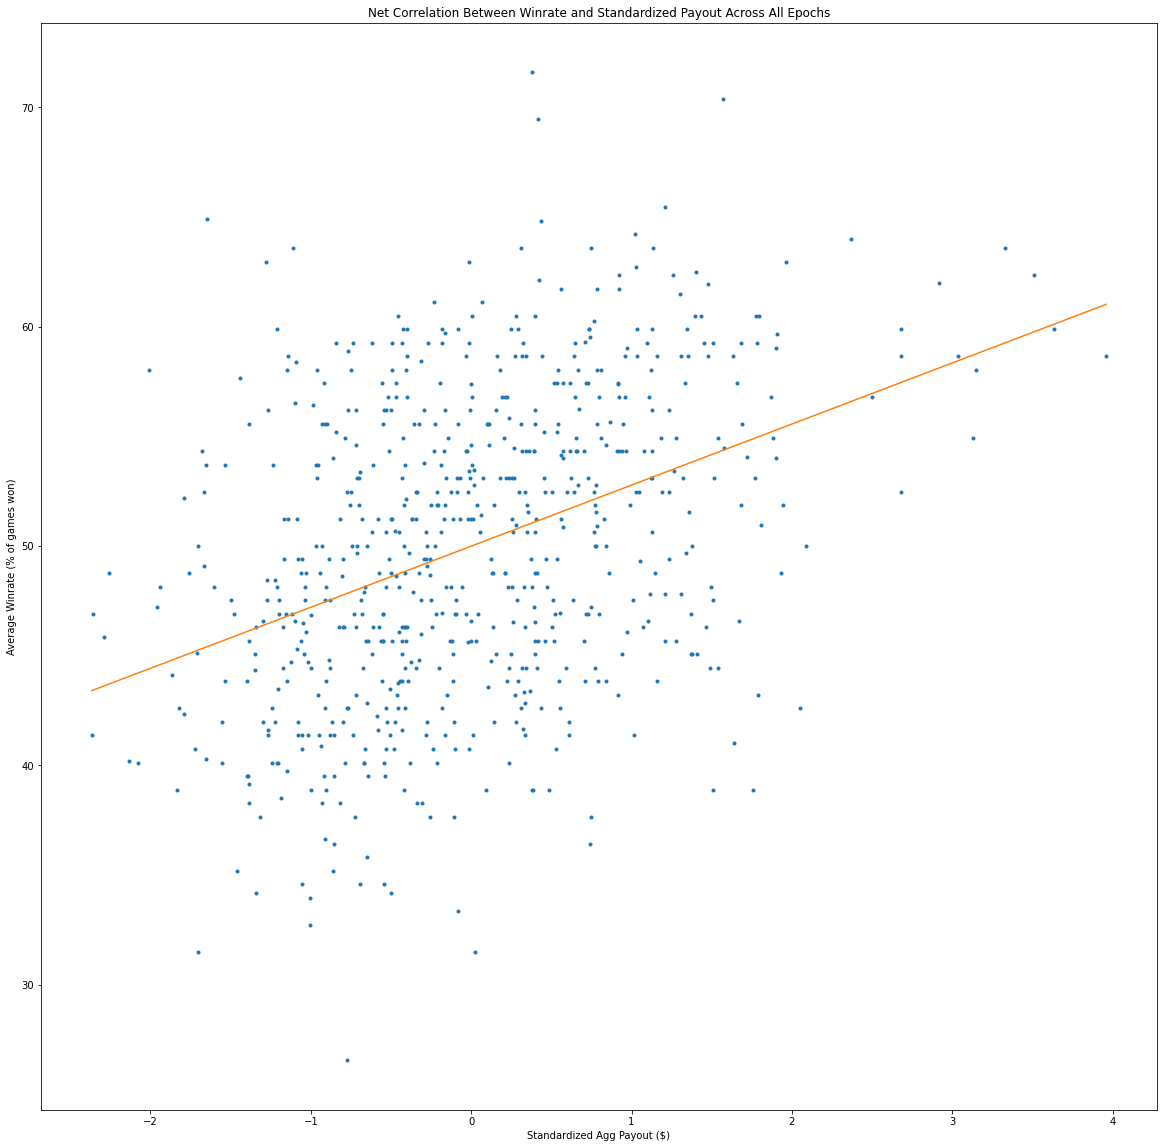

In [16]:
# extract the win rate data
winrate = db[['teamID', 'yearID', 'winrate']].copy()

# generate one full table containing winrate data and payout_full data
payout_win = payout_full.merge(winrate, how='inner', left_on=['teamID', 'yearID'], right_on=['teamID', 'yearID'])

# extract the independent and dependent variables so we can do a lin reg
X = payout_win['std_pay'].values
y = payout_win['winrate'].values

# modelling a linear regression
linreg = np.poly1d(np.polyfit(x=X,y=y,deg=1))
x_mock = np.linspace(start=X.min(), stop=X.max(), num=150)
y_mock = linreg(x_mock)

# plotting the points
plt.figure(figsize=(20,20))
plt.title('Net Correlation Between Winrate and Standardized Payout Across All Epochs')
plt.xlabel('Standardized Agg Payout ($)')
plt.ylabel('Average Winrate (% of games won)')
plt.plot(X, y, '.', x_mock, y_mock)
plt.show()

## Spending Efficiency

### Problem 8:

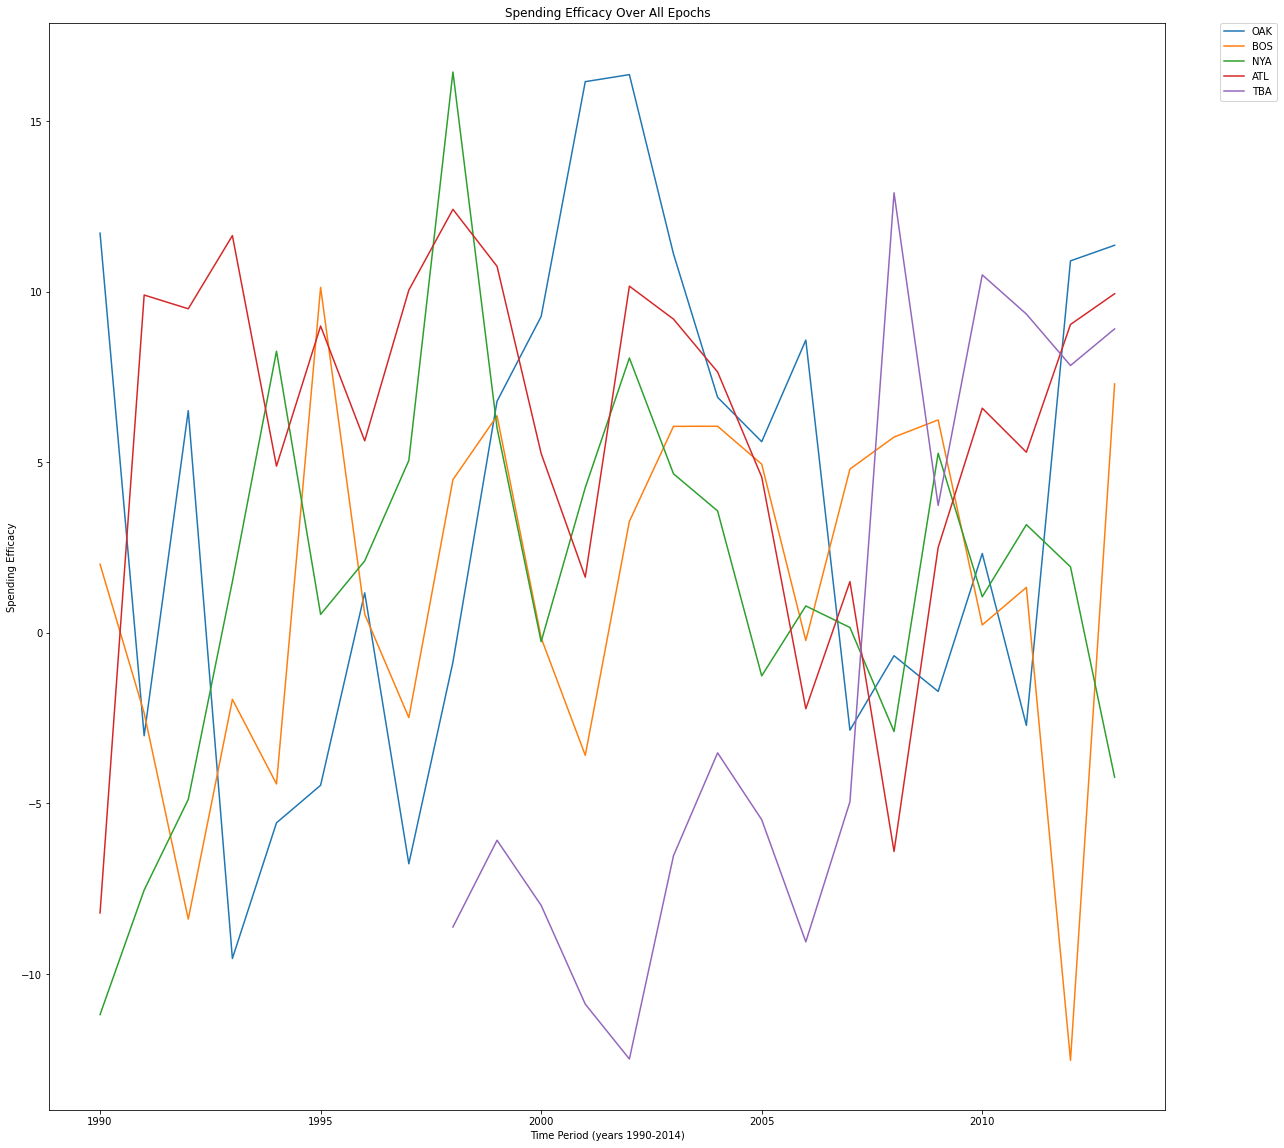

In [28]:
# computing expected win percentage
payout_win['expected winrate'] = 50 + 2.5*payout_win['std_pay']

# computing efficacy
payout_win['efficacy'] = payout_win['winrate'] - payout_win['expected winrate']

# setting teams for which we are plotting the efficacy
teams = ['OAK', 'BOS', 'NYA', 'ATL', 'TBA']

# pre-generate plot so we can simultaneously plot all the teams
plt.figure(figsize=(20,20))
plt.xlabel('Time Period (years 1990-2014)')
plt.ylabel('Spending Efficacy')
plt.title('Spending Efficacy Over All Epochs')

for team in teams:
    # extracting relevant team data
    sum_data = payout_win[payout_win['teamID'] == team]
    
    #plots that data and fills any value that was MIA with null (incase team didn't exist prior to a certain date)
    plt.plot(sum_data['yearID'], sum_data['efficacy'].fillna(value=0), label=team)
    plt.legend(bbox_to_anchor = (1.1, 1), loc = 0, borderaxespad = 0.)

### Question 4:

OAK's spending efficacy is actually not as good as once thought. Their spending efficacy maxed during the moneyball period, however their fluctuations are standard per other teams. Because we define our spending efficacy as the deviation between the actual win rate and the expected win rate, we realise a larger degree of volatility in our graph as compared to graphs in problem 2 and 3. That is why we cannot make a definitive statement with just these features as to the relationship between aggregate payout and win rate. There seemed to be a positive correlation initially, but once we standardize for other teams, we realise that no one team has a definitive positive correlation between paying their players more = higher win rates.